In [43]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
plt.rc("font", size=14)
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


%matplotlib inline

In [2]:
dataset = pd.read_csv('C:\\Users\\ajens\\OneDrive\\Documents\\Personal\\A.Jensen MDS\\loan_data.csv')

In [3]:
dataset.shape

(9578, 14)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
# remove variables (if needed) and check if there are any missing values in any attributes
NA_val = dataset.isna().sum()
print(NA_val)
print(f'New shape: {dataset.shape}')

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
New shape: (9578, 14)


In [6]:
dataset.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
# find variables with highest correlations
corr_matrix = dataset.corr()
print(corr_matrix["not.fully.paid"].sort_values(ascending=False))

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64


In [8]:
dataset['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

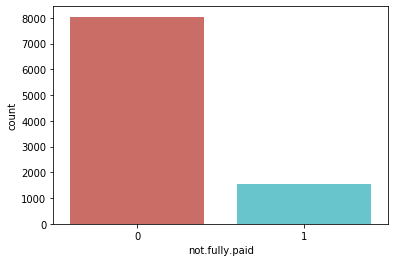

In [9]:
sns.countplot(x='not.fully.paid',data=dataset, palette='hls')
plt.show()

In [12]:
count_not_paid = len(dataset[dataset['not.fully.paid']==0])
count_paid = len(dataset[dataset['not.fully.paid']==1])
pct_of_not_paid = count_not_paid/(count_not_paid+count_paid)
print("percentage of loans fully paid:", pct_of_not_paid*100)
pct_of_paid = count_paid/(count_not_paid+count_paid)
print("percentage of loans not fully paid:", pct_of_paid *100)

percentage of loans fully paid: 83.99457089162664
percentage of loans not fully paid: 16.005429108373356


In [13]:
dataset.groupby('not.fully.paid').mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,
0,0.832318,0.120770,314.574123,10.941091,12.494413,713.326911,4592.632624,16122.724425,45.759608,1.433934,0.161591,0.056557
1,0.661448,0.132452,342.785114,10.885023,13.195838,697.828441,4393.541259,21066.293542,52.255075,2.330724,0.174821,0.091324


In [14]:
# Rename columns that have a "." to help with coding
df= dataset.rename(columns={"not.fully.paid": "not_fully_paid", "credit.policy": "credit_policy", "int.rate": "int_rate",\
                           "log.annual.inc": "log_annual_inc", "days.with.cr.line": "days_with_cr_line", "pub.rec": "pub_rec",\
                            "revol.bal": "revol_bal", "inq.last.6mths": "inq_last_6mths", "delinq.2yrs": "delinq_2yrs",\
                           "revol.util": "revol_util"})

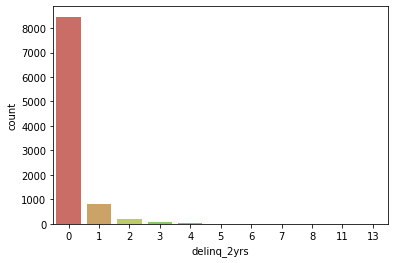

In [15]:
sns.countplot(x='delinq_2yrs',data=df, palette='hls')
plt.show()

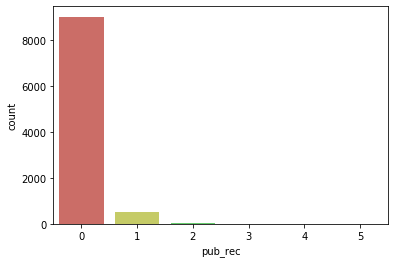

In [16]:
sns.countplot(x='pub_rec',data=df, palette='hls')
plt.show()

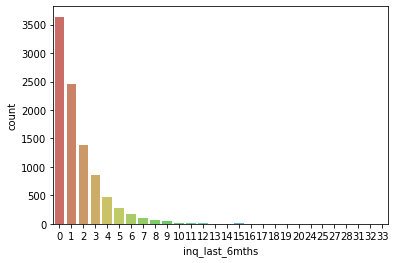

In [17]:
sns.countplot(x='inq_last_6mths', data=df, palette='hls')
plt.show()

Text(0, 0.5, 'Count of paid loans')

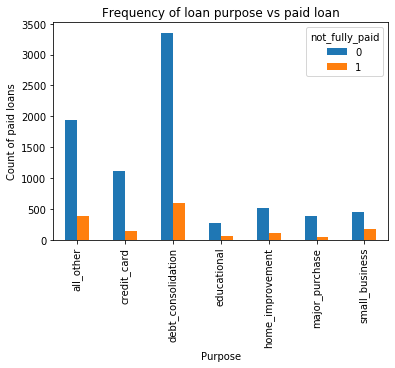

In [18]:
%matplotlib inline
pd.crosstab(df.purpose, df.not_fully_paid).plot(kind='bar')
plt.title('Frequency of loan purpose vs paid loan')
plt.xlabel('Purpose')
plt.ylabel('Count of paid loans')

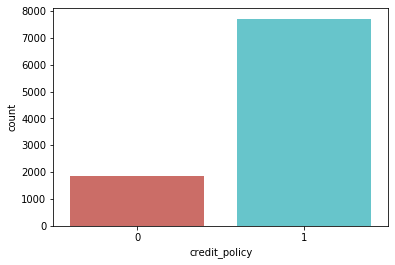

In [19]:
sns.countplot(x='credit_policy',data=df, palette='hls')
plt.show()

Text(0, 0.5, 'Count of paid loans')

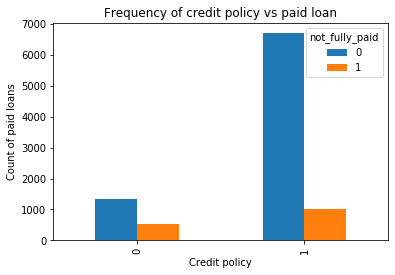

In [20]:
%matplotlib inline
pd.crosstab(df.credit_policy, df.not_fully_paid).plot(kind='bar')
plt.title('Frequency of credit policy vs paid loan')
plt.xlabel('Credit policy')
plt.ylabel('Count of paid loans')

Text(0.5, 0, 'FICO')

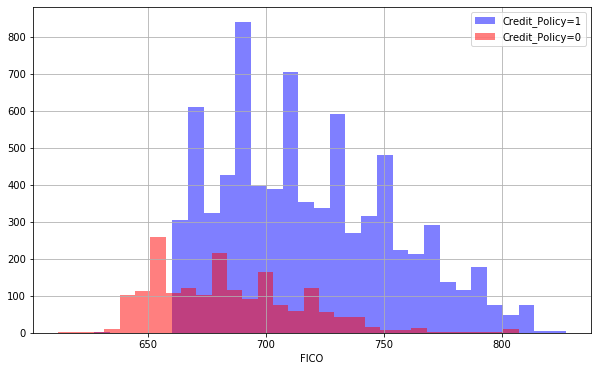

In [21]:
plt.figure(figsize=(10,6))
df[df['credit_policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit_Policy=1')
df[df['credit_policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit_Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

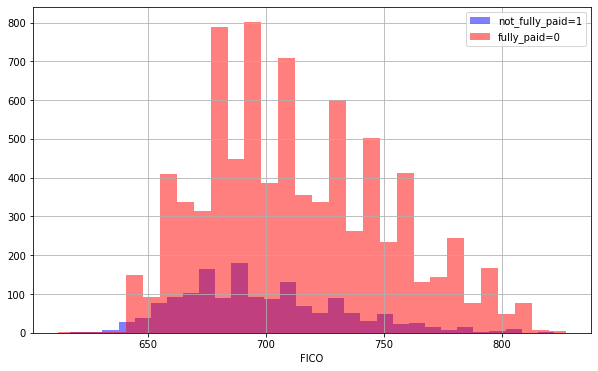

In [22]:
plt.figure(figsize=(10,6))
df[df['not_fully_paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not_fully_paid=1')
df[df['not_fully_paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='fully_paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0, 0.5, 'Frequency')

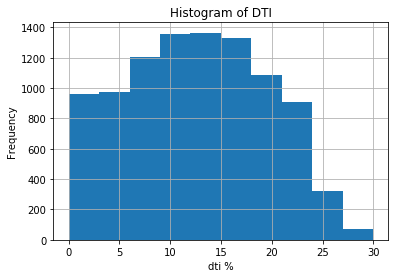

In [23]:
df.dti.hist()
plt.title('Histogram of DTI')
plt.xlabel('dti %')
plt.ylabel('Frequency')

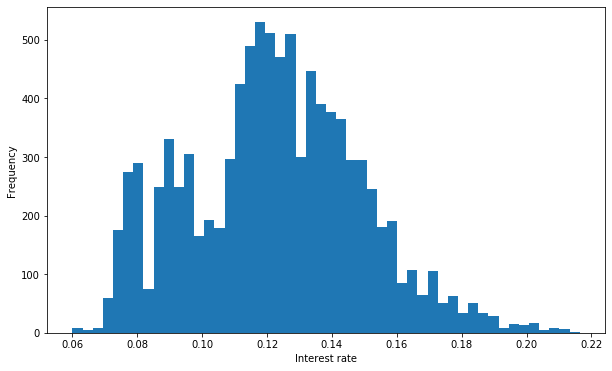

In [24]:
## Show distribution for Continuous variables
plt.xlabel('Interest rate')
df['int_rate'].plot(kind='hist', bins=50, figsize=(10,6))

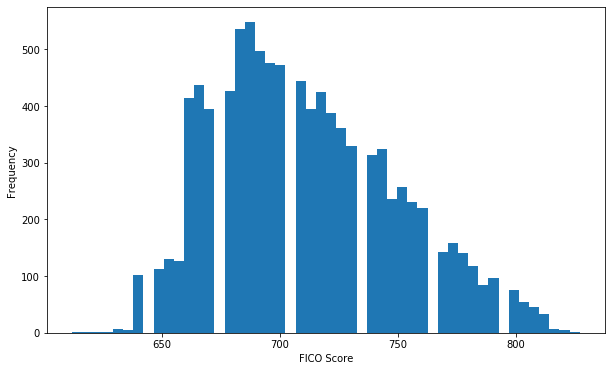

In [25]:
plt.xlabel('FICO Score')
df['fico'].plot(kind='hist', bins=50, figsize=(10,6))

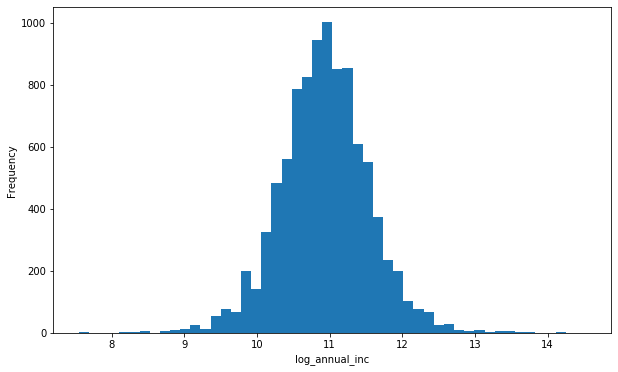

In [26]:
plt.xlabel('log_annual_inc')
df['log_annual_inc'].plot(kind='hist', bins=50, figsize=(10,6))

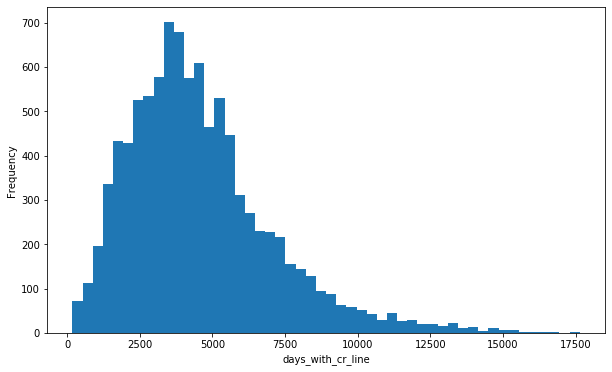

In [27]:
plt.xlabel('days_with_cr_line')
df['days_with_cr_line'].plot(kind='hist', bins=50, figsize=(10,6))

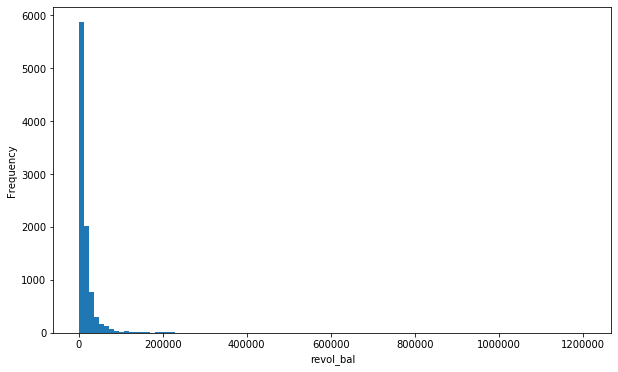

In [28]:
plt.xlabel('revol_bal')
df['revol_bal'].plot(kind='hist', bins=100, figsize=(10,6))

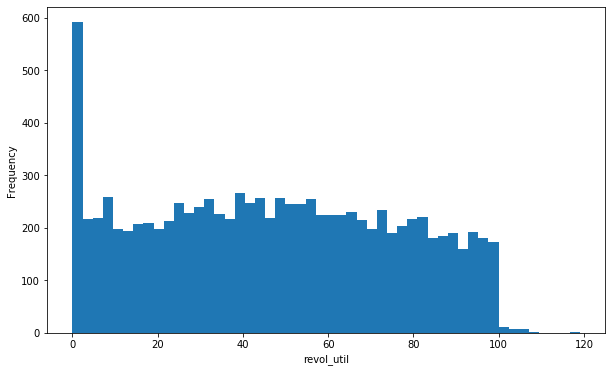

In [29]:
plt.xlabel('revol_util')
df['revol_util'].plot(kind='hist', bins=50, figsize=(10,6))

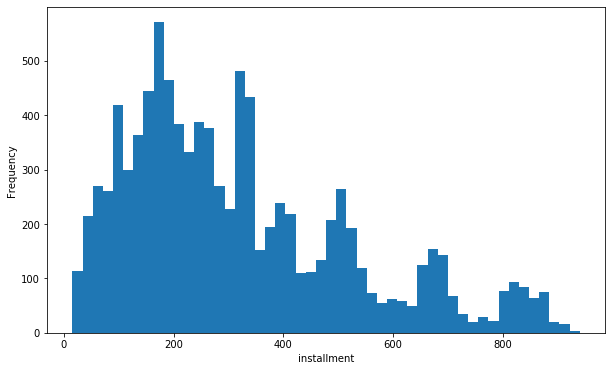

In [30]:
plt.xlabel('installment')
df['installment'].plot(kind='hist', bins=50, figsize=(10,6))

In [31]:
# Create dummy variable for the catagorical variable. Create a list containing 1 element with the string 
# "purpose" so we are calling the column we want to create dummies for.
purpose = ['purpose']

# Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe 
# that has new feature columns with dummy variables (this is one hot encoding). Set this dataframe as final_df.
final_df = pd.get_dummies(df,columns= ['purpose'],drop_first=True)


In [32]:
# see new columns
final_df.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [33]:
# Create X and y axis for pre-training. Axis tells us the row to find the column name we are dropping. 
y= final_df['not_fully_paid']
X= final_df.drop(['not_fully_paid'], axis= 1)

In [34]:
# Automatic feature selection
select = SelectPercentile(percentile= 25)
select.fit(X, y)
X_selected= select.transform(X)

In [35]:
# Show shape of pre and post feature selection
print(f'X.shape: {X.shape}\nX_Selected.shape: {X_selected.shape}')
select.get_support()

X.shape: (9578, 18)
X_Selected.shape: (9578, 5)


array([ True,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True])

In [36]:
selected_feat= X.columns[(select.get_support())]
print('Top 50 percent of feature importance:')
for f in selected_feat:
    print(f'-{f}')

Top 50 percent of feature importance:
-credit_policy
-int_rate
-fico
-inq_last_6mths
-purpose_small_business


In [37]:
# adding a constant. A variable, obviously, varies over time. If it doesn't vary, there is "no loss".
# When you tell the compiler that the value will not change, the compiler can do a whole bunch of 
# optimizations, like directly inlining the value and never allocating any space for the constant on the stack.
X= sm.add_constant(X)

C:\Users\ajens\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
# Checking multicollinearity(1 indicates low correlation. 1-5 indicates low to moderate. 
# Above 5 indicates high correlation between independent variables). Multicollinearity does not reduce
# the explanatory power of the model, but does reduce the statistical significance of the independent variables.
vif= pd.Series([variance_inflation_factor(X.values, i) for i in range (X.shape[1])], index= X.columns)

vif.sort_values(ascending= False).head(18)

const                         2037.291035
fico                             3.441987
int_rate                         2.955136
revol_util                       1.778073
purpose_debt_consolidation       1.766167
installment                      1.689225
credit_policy                    1.665187
log_annual_inc                   1.567322
inq_last_6mths                   1.462082
purpose_credit_card              1.408817
revol_bal                        1.375754
purpose_small_business           1.308354
days_with_cr_line                1.307528
dti                              1.229533
purpose_home_improvement         1.220337
delinq_2yrs                      1.140619
purpose_major_purchase           1.138161
purpose_educational              1.117028
dtype: float64

In [39]:
X= X.drop('const', axis= 1)
corr_melt= pd.melt(X.corr())
corr_melt= corr_melt[corr_melt['value']< 1.0]
corr_melt['value']= np.abs(corr_melt['value'])
corr_melt.sort_values('value', ascending= False, inplace= True)
corr_melt.head(20)

,variable,value
91,fico,0.714821
23,int_rate,0.714821
98,fico,0.541289
149,revol_util,0.541289
162,inq_last_6mths,0.535511
9,credit_policy,0.535511
145,revol_util,0.464837
26,int_rate,0.464837
56,log_annual_inc,0.448102
39,installment,0.448102


In [45]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy= 'auto')
# fit and apply the transform
X, y = over.fit_resample(X, y)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='auto')
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({0: 8045, 1: 8045})


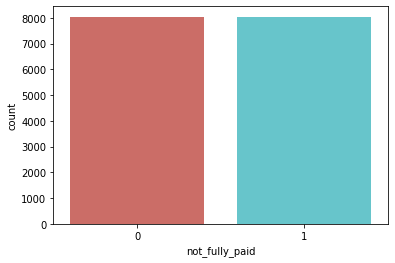

In [46]:
sns.countplot(x= y, data=final_df, palette='hls')
plt.show()

Text(0.5, 0, 'FICO')

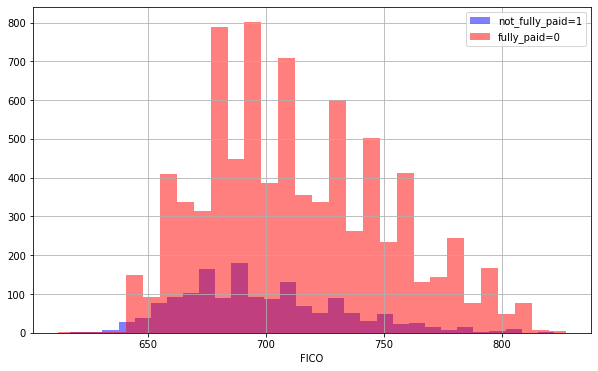

In [47]:
plt.figure(figsize=(10,6))
df[df['not_fully_paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not_fully_paid=1')
df[df['not_fully_paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='fully_paid=0')
plt.legend()
plt.xlabel('FICO')

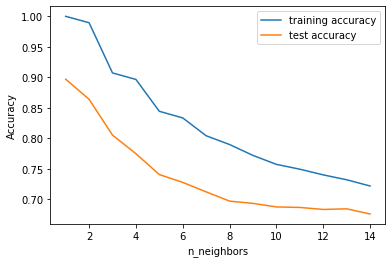

In [48]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# preprocessing
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)


training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_scaled, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [49]:
# Running KNN for various values of n_neighbors and storing results
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    # preprocessing
    scaler= StandardScaler()
    scaler.fit(X_train)
    X_train_scaled= scaler.transform(X_train)
    X_test_scaled= scaler.transform(X_test)
    # fit model
    knn.fit(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_score = knn.score(X_train_scaled, y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.897037     1.000000
1    2    0.864098     0.989523
2    3    0.805469     0.907307
3    4    0.775016     0.896653
4    5    0.740833     0.844446
5    6    0.727988     0.833614
6    7    0.712451     0.804404
7    8    0.697328     0.790020
8    9    0.693599     0.772174
9   10    0.687798     0.757525
10  11    0.686969     0.749623
11  12    0.683654     0.740300
12  13    0.684690     0.732309
13  14    0.676196     0.722099
14  15    0.673710     0.717393
15  16    0.664802     0.712865


In [50]:
# preprocessing
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# fit model
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print("Training set accuracy: {:.2f}".format(clf.score(X_train_scaled, y_train)))
print("Accuracy of KNN classifier on test set: {:.2f}".format(clf.score(X_test_scaled, y_test)))

Training set accuracy: 0.91
Accuracy of KNN classifier on test set: 0.81


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[1647  745]
 [ 194 2241]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      2392
           1       0.75      0.92      0.83      2435

    accuracy                           0.81      4827
   macro avg       0.82      0.80      0.80      4827
weighted avg       0.82      0.81      0.80      4827



In [52]:
# preprocessing
scaler= StandardScaler()
Xs= scaler.fit_transform(X)

# cross validation score
scores= cross_val_score(clf, Xs, y, cv= 10)
print(scores)
print(f'\nAverage Cross Validation score= {np.mean(scores)}')

[0.85456805 0.85891858 0.85083903 0.8769422  0.87569919 0.85829708
 0.87010566 0.86637663 0.72156619 0.58359229]

Average Cross Validation score= 0.8216904909881915


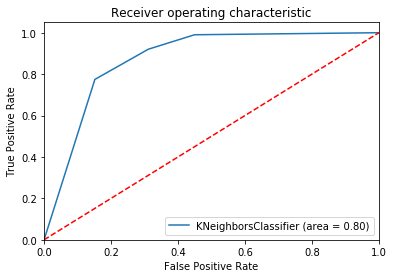

In [53]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighborsClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# preprocessing
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# fit model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print("Training set accuracy: {:.2f}".format(logreg.score(X_train_scaled, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_scaled, y_test)))

Training set accuracy: 0.63
Accuracy of logistic regression classifier on test set: 0.62


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[1561  831]
 [ 997 1438]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      2392
           1       0.63      0.59      0.61      2435

    accuracy                           0.62      4827
   macro avg       0.62      0.62      0.62      4827
weighted avg       0.62      0.62      0.62      4827



In [56]:
# cross validation score
scores= cross_val_score(logreg, Xs, y, cv= 10)
print(scores)
print(f'\nAverage Cross Validation score= {np.mean(scores)}')

[0.6302051  0.68116843 0.63828465 0.68676196 0.68054692 0.6612803
 0.65568676 0.68054692 0.43753884 0.27967682]

Average Cross Validation score= 0.603169670602859


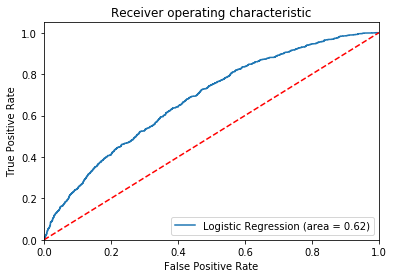

In [57]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# preprocessing
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# fit model
dectree = DecisionTreeClassifier()
dectree.fit(X_train_scaled, y_train)
y_pred = dectree.predict(X_test_scaled)
print("Training set accuracy: {:.2f}".format(dectree.score(X_train_scaled, y_train)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dectree.score(X_test_scaled, y_test)))

Training set accuracy: 1.00
Accuracy of decision tree classifier on test set: 0.89


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[1906  486]
 [  43 2392]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2392
           1       0.83      0.98      0.90      2435

    accuracy                           0.89      4827
   macro avg       0.90      0.89      0.89      4827
weighted avg       0.90      0.89      0.89      4827



In [60]:
# cross validation score
scores= cross_val_score(dectree, Xs, y, cv= 10)
print(scores)
print(f'\nAverage Cross Validation score= {np.mean(scores)}')

[0.87321318 0.91423244 0.91423244 0.92541952 0.92169049 0.91796147
 0.92666252 0.93660659 0.78060907 0.64449969]

Average Cross Validation score= 0.8755127408328154


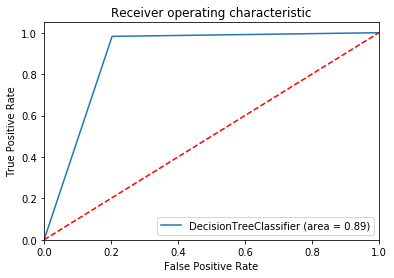

In [61]:
logit_roc_auc = roc_auc_score(y_test, dectree.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, dectree.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# preprocessing
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# fit model
gradbm = GradientBoostingClassifier()
gradbm.fit(X_train_scaled, y_train)
y_pred = gradbm.predict(X_test_scaled)
print("Training set accuracy: {:.2f}".format(gradbm.score(X_train_scaled, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(gradbm.score(X_test_scaled, y_test)))

Training set accuracy: 0.71
Accuracy of Gradient Boosting classifier on test set: 0.67


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[1645  747]
 [ 829 1606]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      2392
           1       0.68      0.66      0.67      2435

    accuracy                           0.67      4827
   macro avg       0.67      0.67      0.67      4827
weighted avg       0.67      0.67      0.67      4827



In [70]:
# cross validation score
scores= cross_val_score(gradbm, Xs, y, cv= 10)
print(scores)
print(f'\nAverage Cross Validation score= {np.mean(scores)}')

[0.66065879 0.71597265 0.68862648 0.74642635 0.72902424 0.71224363
 0.71783717 0.72218769 0.46488502 0.32504661]

Average Cross Validation score= 0.6482908638906152


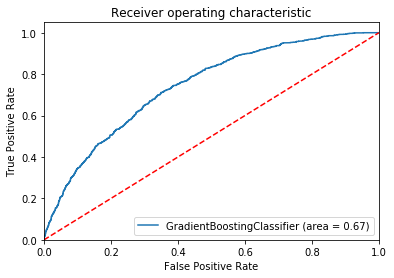

In [71]:
logit_roc_auc = roc_auc_score(y_test, gradbm.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, gradbm.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GradientBoostingClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# preprocessing
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# fit model
randfor = RandomForestClassifier()
randfor.fit(X_train_scaled, y_train)
y_pred = randfor.predict(X_test_scaled)
print("Training set accuracy: {:.2f}".format(randfor.score(X_train_scaled, y_train)))
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(randfor.score(X_test_scaled, y_test)))

Training set accuracy: 1.00
Accuracy of decision tree classifier on test set: 0.96


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[2255  137]
 [  52 2383]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2392
           1       0.95      0.98      0.96      2435

    accuracy                           0.96      4827
   macro avg       0.96      0.96      0.96      4827
weighted avg       0.96      0.96      0.96      4827



In [74]:
# cross validation score
scores= cross_val_score(randfor, Xs, y, cv= 10)
print(scores)
print(f'\nAverage Cross Validation score= {np.mean(scores)}')

[0.98943443 0.98632691 0.98632691 0.99254195 0.99502797 0.98819142
 0.98881293 0.99316346 0.76444997 0.59167185]

Average Cross Validation score= 0.9275947793660657


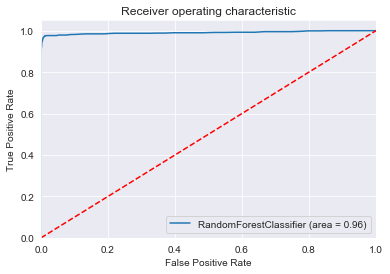

In [532]:
logit_roc_auc = roc_auc_score(y_test, randfor.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, randfor.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()